In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import json
import sys
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [2]:
ds = '1'

In [3]:
# ds = input('Which dataset do you want to run on? Enter 1 for \'Raw\', 2 for \'EMNIST\' \
# or 3 for \'Chars74K')

In [4]:
i = 0

while i == 0:
    if ds == '1':
        directory = "../input/yaromnist-dataset/Raw Handwritten Roman Numerals Dataset"
        user_data = directory + "/train"
        valid_data = directory + "/val"
        test_data = directory + "/test" # this can be the label book, or any other test set you create
        i = 1
    elif ds == '2':
        directory = "../input/emnistbased-handwritten-roman-numerals/500_each_EMNIST-based-Roman"
        user_data = directory + "/train"
        valid_data = directory + "/val"
        test_data = directory + "/test" # this can be the label book, or any other test set you create
        i = 1
    elif ds == '3':
        directory = "../input/basedonenglishhandwrittencharactersmodified/Based-Chars74K-image-dataset-Roman"
        user_data = directory + "/train"
        valid_data = directory + "/val"
        test_data = directory + "/test" # this can be the label book, or any other test set you create
        i = 1
    else: ds = input('Sorry, try again!')
        

In [5]:
### DO NOT MODIFY BELOW THIS LINE, THIS IS THE FIXED MODEL ###
batch_size = 8
tf.random.set_seed(123)


if __name__ == "__main__":
    train = tf.keras.preprocessing.image_dataset_from_directory(
        user_data,
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    valid = tf.keras.preprocessing.image_dataset_from_directory(
        valid_data,
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    total_length = ((train.cardinality() + valid.cardinality()) * batch_size).numpy()
    if total_length > 10_000:
        print(f"Dataset size larger than 10,000. Got {total_length} examples")
        sys.exit()

    test = tf.keras.preprocessing.image_dataset_from_directory(
        test_data,
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=False,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )
    
    start = timer() # Not in original code

    base_model = tf.keras.applications.ResNet50(
        input_shape=(32, 32, 3),
        include_top=False,
        weights=None,
    )
    base_model = tf.keras.Model(
        base_model.inputs, outputs=[base_model.get_layer("conv2_block3_out").output]
    )

    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.applications.resnet.preprocess_input(inputs)
    x = base_model(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(10)(x)
    model = tf.keras.Model(inputs, x)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr=0.0001),
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    model.summary()
    loss_0, acc_0 = model.evaluate(valid)
    print(f"loss {loss_0}, acc {acc_0}")

    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        "best_model",
        monitor="val_accuracy",
        mode="max",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        train,
        validation_data=valid,
        epochs=100,
        callbacks=[checkpoint],
    )

    model.load_weights("best_model")

    loss, acc = model.evaluate(valid)
    print(f"final loss {loss}, final acc {acc}")

    test_loss, test_acc = model.evaluate(test)
    print(f"test loss {test_loss}, test acc {test_acc}")
    
    end = timer() # Not in original code
    print("Time taken = " + str(end - start) + ' s') # Not in original code

Found 2321 files belonging to 10 classes.



User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'


Found 663 files belonging to 10 classes.
Found 333 files belonging to 10 classes.


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 32, 32, 3)         0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 32, 32, 3)         0         
_________________________________________________________________
model (Functional)           (None, 8, 8, 256)         229760    
_________________________________________________________________
global_average_pooling2d (Gl (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
Total params: 232,330
Trainable params: 229,386
Non-trainable params: 2,944
_________________________________________________

2022-02-14 18:53:04.840106: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


83/83 [==============================] - 2s 17ms/step - loss: 19.7585 - accuracy: 0.1011
loss 19.75853157043457, acc 0.101055808365345
Epoch 1/100
291/291 [==============================] - 15s 44ms/step - loss: 2.2400 - accuracy: 0.1909 - val_loss: 2.1435 - val_accuracy: 0.2338
Epoch 2/100
291/291 [==============================] - 12s 39ms/step - loss: 1.7494 - accuracy: 0.4059 - val_loss: 1.6746 - val_accuracy: 0.4163
Epoch 3/100
291/291 [==============================] - 12s 42ms/step - loss: 1.3906 - accuracy: 0.5308 - val_loss: 1.5456 - val_accuracy: 0.4585
Epoch 4/100
291/291 [==============================] - 12s 39ms/step - loss: 1.1833 - accuracy: 0.6135 - val_loss: 1.1288 - val_accuracy: 0.6305
Epoch 5/100
291/291 [==============================] - 12s 40ms/step - loss: 1.0086 - accuracy: 0.6747 - val_loss: 1.0255 - val_accuracy: 0.6712
Epoch 6/100
291/291 [==============================] - 12s 40ms/step - loss: 0.8344 - accuracy: 0.7337 - val_loss: 0.9067 - val_accuracy: 0.

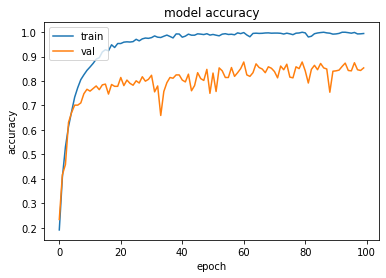

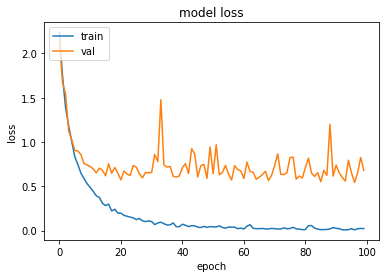

In [6]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [7]:
stopping = tf.keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        min_delta=0,
        patience=10,
        verbose=0,
        mode="auto",
        baseline=None,
        restore_best_weights=False,
    )

checkpoint = tf.keras.callbacks.ModelCheckpoint(
        "best_model",
        monitor="val_accuracy",
        mode="max",
        save_best_only=True,
        save_weights_only=True,
    )

In [8]:
start_2 = timer()

base_model_2 = tf.keras.applications.ResNet50(weights=None, input_shape=(32, 32, 3), classes=10)

inputs_2 = tf.keras.Input(shape=(32, 32, 3))
x_2 = tf.keras.applications.resnet.preprocess_input(inputs_2)
x_2 = base_model_2(x_2)
model_2 = tf.keras.Model(inputs_2, x_2)

model_2.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss=tf.keras.losses.CategoricalCrossentropy(),#from_logits=True),
        metrics=["accuracy"]
    )
 
loss_0, acc_0 = model_2.evaluate(valid)
print(f"loss {loss_0}, acc {acc_0}")
    

history_2 = model_2.fit(
        train,
        validation_data=valid,
        epochs=100,
        callbacks=[stopping, checkpoint]
)

model_2.load_weights("best_model")

loss, acc = model_2.evaluate(valid)
print(f"final loss {loss}, final acc {acc}")

test_loss, test_acc = model_2.evaluate(test)
print(f"test loss {test_loss}, test acc {test_acc}")
    
end_2 = timer()
print("Time taken = " + str(end_2 - start_2) + ' s')

83/83 [==============================] - 11s 103ms/step - loss: 4.7931 - accuracy: 0.1116
loss 4.7930588722229, acc 0.11161387711763382
Epoch 1/100
291/291 [==============================] - 133s 433ms/step - loss: 3.2995 - accuracy: 0.1081 - val_loss: 2.5670 - val_accuracy: 0.1086
Epoch 2/100
291/291 [==============================] - 141s 485ms/step - loss: 2.9820 - accuracy: 0.1228 - val_loss: 7.1563 - val_accuracy: 0.0875
Epoch 3/100
291/291 [==============================] - 126s 433ms/step - loss: 2.7249 - accuracy: 0.1262 - val_loss: 3.4897 - val_accuracy: 0.1101
Epoch 4/100
291/291 [==============================] - 126s 432ms/step - loss: 2.5170 - accuracy: 0.1517 - val_loss: 4.0991 - val_accuracy: 0.1131
Epoch 5/100
291/291 [==============================] - 128s 439ms/step - loss: 2.4134 - accuracy: 0.1715 - val_loss: 3.5657 - val_accuracy: 0.1780
Epoch 6/100
291/291 [==============================] - 136s 469ms/step - loss: 2.3003 - accuracy: 0.1874 - val_loss: 4.7485 - val

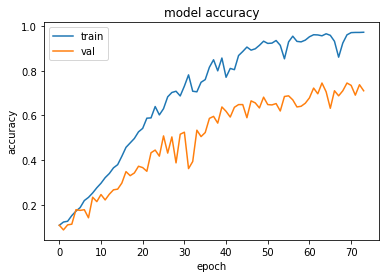

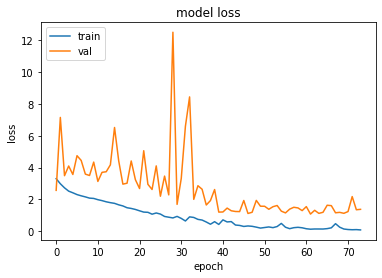

In [9]:
# summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
start_3 = timer()

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    
])

model_3.compile(
        optimizer=tf.keras.optimizers.Adam(lr=0.0001),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=["accuracy"]
    )

history_3 = model_3.fit(
        train,
        validation_data=valid,
        epochs=100,
        callbacks=[stopping, checkpoint]
    )

model_3.load_weights("best_model")

loss, acc = model_3.evaluate(valid)
print(f"final loss {loss}, final acc {acc}")

test_loss, test_acc = model_3.evaluate(test)
print(f"test loss {test_loss}, test acc {test_acc}")

end_3 = timer()
print("Time taken = " + str(end_3 - start_3) + ' s')

Epoch 1/100
291/291 [==============================] - 5s 13ms/step - loss: 4.9303 - accuracy: 0.1344 - val_loss: 3.7943 - val_accuracy: 0.1071
Epoch 2/100
291/291 [==============================] - 4s 12ms/step - loss: 2.7653 - accuracy: 0.1736 - val_loss: 2.9391 - val_accuracy: 0.1674
Epoch 3/100
291/291 [==============================] - 4s 13ms/step - loss: 2.3749 - accuracy: 0.2258 - val_loss: 2.6614 - val_accuracy: 0.2112
Epoch 4/100
291/291 [==============================] - 4s 13ms/step - loss: 2.0895 - accuracy: 0.2844 - val_loss: 2.5148 - val_accuracy: 0.2413
Epoch 5/100
291/291 [==============================] - 4s 13ms/step - loss: 1.8939 - accuracy: 0.3430 - val_loss: 2.3956 - val_accuracy: 0.2670
Epoch 6/100
291/291 [==============================] - 4s 15ms/step - loss: 1.7264 - accuracy: 0.4063 - val_loss: 2.2894 - val_accuracy: 0.3152
Epoch 7/100
291/291 [==============================] - 4s 13ms/step - loss: 1.5829 - accuracy: 0.4438 - val_loss: 2.1287 - val_accuracy:

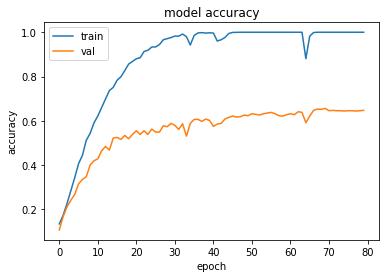

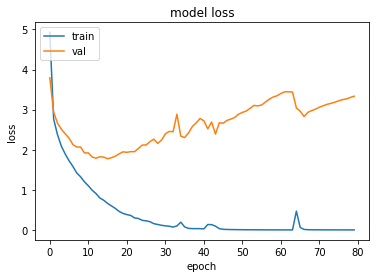

In [11]:
# summarize history for accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()